In [4]:
from eeg_net.eeg_resnet import * 
from eeg_net.eeg_net_base import *
from eeg_net.eeg_rnn import * 
from eeg_net.eeg_cnn2 import *
from eeg_net.eeg_cnn import *
import numpy as np 
import matplotlib.pyplot as plt 
from torchsummary import summary
from eeg_net.solver import * 
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

X_test = np.load("data/X_test.npy")
y_test = np.load("data/y_test.npy")
person_train_valid = np.load("data/person_train_valid.npy")
X_train_valid = np.load("data/X_train_valid.npy")
y_train_valid = np.load("data/y_train_valid.npy")
person_test = np.load("data/person_test.npy")

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))
X_test_dir = './data/X_test.npy'
y_test_dir = './data/y_test.npy' 
X_train_valid_dir = './data/X_train_valid.npy' 
y_train_valid_dir = './data/y_train_valid.npy'
X_test_dsample_dir = './data/X_test_downsample.npy'
y_test_dsample_dir = './data/y_test_downsample.npy' 
X_train_valid_dsample_dir = './data/X_train_valid_downsample.npy' 
y_train_valid_dsample_dir = './data/y_train_valid_downsample.npy'
X_test_ds = np.load(X_test_dsample_dir)
y_test_ds = np.load(y_test_dsample_dir)
X_train_valid_ds = np.load(X_train_valid_dsample_dir)
y_train_valid_ds = np.load(y_train_valid_dsample_dir)

X_train_val_05_70_dir = './data/band_pass_data/X_train_val_05_70.npy'
X_train_val_01_70_dir = './data/band_pass_data/X_train_val_01_70.npy' 
X_train_val_05_70_ds_dir = './data/band_pass_data/X_train_val_downsample_05_70.npy'
X_train_val_01_70_ds_dir = './data/band_pass_data/X_train_val_downsample_01_70.npy' 

X_train_val_05_70 = np.load(X_train_val_05_70_dir)
X_train_val_01_70 = np.load(X_train_val_01_70_dir) 
X_train_val_05_70_ds = np.load(X_train_val_05_70_ds_dir)
X_train_val_01_70_ds = np.load(X_train_val_01_70_ds_dir)




print ('Training/Valid data shape: {}'.format(X_train_valid_ds.shape))
print ('Test data shape: {}'.format(X_test_ds.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid_ds.shape))
print ('Test target shape: {}'.format(y_test_ds.shape))


ModuleNotFoundError: No module named 'torch'

In [2]:
model = EEGCNNc2(in_channels = 1, classes = 4)
summary(model.cuda(),(1,22,1000))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 50, 22, 976]           1,300
          Identity-2          [-1, 50, 22, 976]               0
            Conv2d-3          [-1, 50, 10, 976]           7,550
       BatchNorm2d-4          [-1, 50, 10, 976]             100
            Conv2d-5          [-1, 80, 10, 952]         100,080
       BatchNorm2d-6          [-1, 80, 10, 952]             160
          Identity-7          [-1, 80, 10, 952]               0
         MaxPool2d-8          [-1, 80, 10, 476]               0
            Linear-9              [-1, 476, 40]          32,040
         Identity-10              [-1, 476, 40]               0
        AvgPool2d-11               [-1, 62, 40]               0
           Linear-12                    [-1, 4]           9,924
          Softmax-13                    [-1, 4]               0
Total params: 151,154
Trainable params:

In [3]:
model = EEGCNNv2Encoder(in_channels=1) 
summary(model.cuda(),(1,22,1000))
print(model.output_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 50, 22, 976]           1,300
       BatchNorm2d-2          [-1, 50, 22, 976]             100
          Identity-3          [-1, 50, 22, 976]               0
            Conv2d-4          [-1, 50, 10, 976]           7,550
       BatchNorm2d-5          [-1, 50, 10, 976]             100
          Identity-6          [-1, 50, 10, 976]               0
            Conv2d-7          [-1, 80, 10, 952]         100,080
       BatchNorm2d-8          [-1, 80, 10, 952]             160
          Identity-9          [-1, 80, 10, 952]               0
        MaxPool2d-10          [-1, 80, 10, 476]               0
Total params: 109,290
Trainable params: 109,290
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.08
Forward/backward pass size (MB): 56.08
Params size (MB): 0.42
Estimated 

In [9]:
encoder_opt = {
    'gate_conv_size': 30,
    'gate_conv_out_channel': 60,
    'prob_conv_size': 2,
    'feature_conv_size': 15,
    'feature_conv_out_channel': 120,
    'feature_pool_size': 3,
    'activation': 'elu',
}
model = EEGCNNv2(in_channels=1,
    classes=4,
    encoder_opt=encoder_opt,
    input_size=(1,22,500)).cuda() 
summary(model.cuda(),(1,22,1000))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 60, 22, 970]           1,920
       BatchNorm2d-2          [-1, 60, 22, 970]             120
               ELU-3          [-1, 60, 22, 970]               0
            Conv2d-4           [-1, 60, 9, 970]          21,660
       BatchNorm2d-5           [-1, 60, 9, 970]             120
               ELU-6           [-1, 60, 9, 970]               0
            Conv2d-7           [-1, 64, 9, 968]          11,584
       BatchNorm2d-8           [-1, 64, 9, 968]             128
               ELU-9           [-1, 64, 9, 968]               0
        MaxPool2d-10           [-1, 64, 9, 138]               0
  EEGCNNv2Encoder-11           [-1, 64, 9, 138]               0
           Linear-12              [-1, 138, 40]          23,080
         Identity-13              [-1, 138, 40]               0
        AvgPool2d-14               [-1,

In [5]:
encoder_opt = {
    'gate_conv_size': 30,
    'gate_conv_out_channel': 60,
    'prob_conv_size': 2,
    'feature_conv_size': 15,
    'feature_conv_out_channel': 120,
    'feature_pool_size': 3,
    'activation': 'elu',
}
model = EEGCNNv2Encoder(in_channels=1,options=encoder_opt) 
summary(model.cuda(),(1,22,1000))
print(model.output_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 60, 22, 971]           1,860
       BatchNorm2d-2          [-1, 60, 22, 971]             120
               ELU-3          [-1, 60, 22, 971]               0
            Conv2d-4          [-1, 60, 11, 971]           7,260
       BatchNorm2d-5          [-1, 60, 11, 971]             120
               ELU-6          [-1, 60, 11, 971]               0
            Conv2d-7         [-1, 120, 11, 957]         108,120
       BatchNorm2d-8         [-1, 120, 11, 957]             240
               ELU-9         [-1, 120, 11, 957]               0
        MaxPool2d-10         [-1, 120, 11, 319]               0
Total params: 117,720
Trainable params: 117,720
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.08
Forward/backward pass size (MB): 76.13
Params size (MB): 0.45
Estimated 

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.401352
--Iter 99	1.371126
0	1.385261	0.267099	1.378175	0.277778	
--Iter 49	1.423515
--Iter 99	1.394487
1	1.378606	0.292551	1.375412	0.312057	
--Iter 49	1.357002
--Iter 99	1.372510
2	1.367831	0.315645	1.367987	0.336879	
--Iter 49	1.318460
--Iter 99	1.370230
3	1.364186	0.324391	1.367370	0.333333	
--Iter 49	1.384509
--Iter 99	1.337818
4	1.356502	0.349351	1.348132	0.373522	
--Iter 49	1.350515
--Iter 99	1.304527
5	1.352751	0.347779	1.347206	0.374704	
--Iter 49	1.356420
--Iter 99	1.257491
6	1.345626	0.373329	1.341316	0.353428	
--Iter 49	1.340313
--Iter 99	1.301140
7	1.336740	0.391411	1.341149	0.367612	
--Iter 49	1.308966
--Iter 99	1.336640
8	1.333699	0.405169	1.326558	0.436170	
--Iter 49	1.293966
--Iter 99	1.361755
9	1.324947	0.414308	1.324214	0.466903	
--Iter 49	1.253947
--Iter 99	1.293106
10	1.312605	0.458137	1.333188	0.407801	
--Iter 49	1.335993
--Iter 99	1.303880
11	1.313519	0.444379	1.337473	0.356974	
--Iter 49

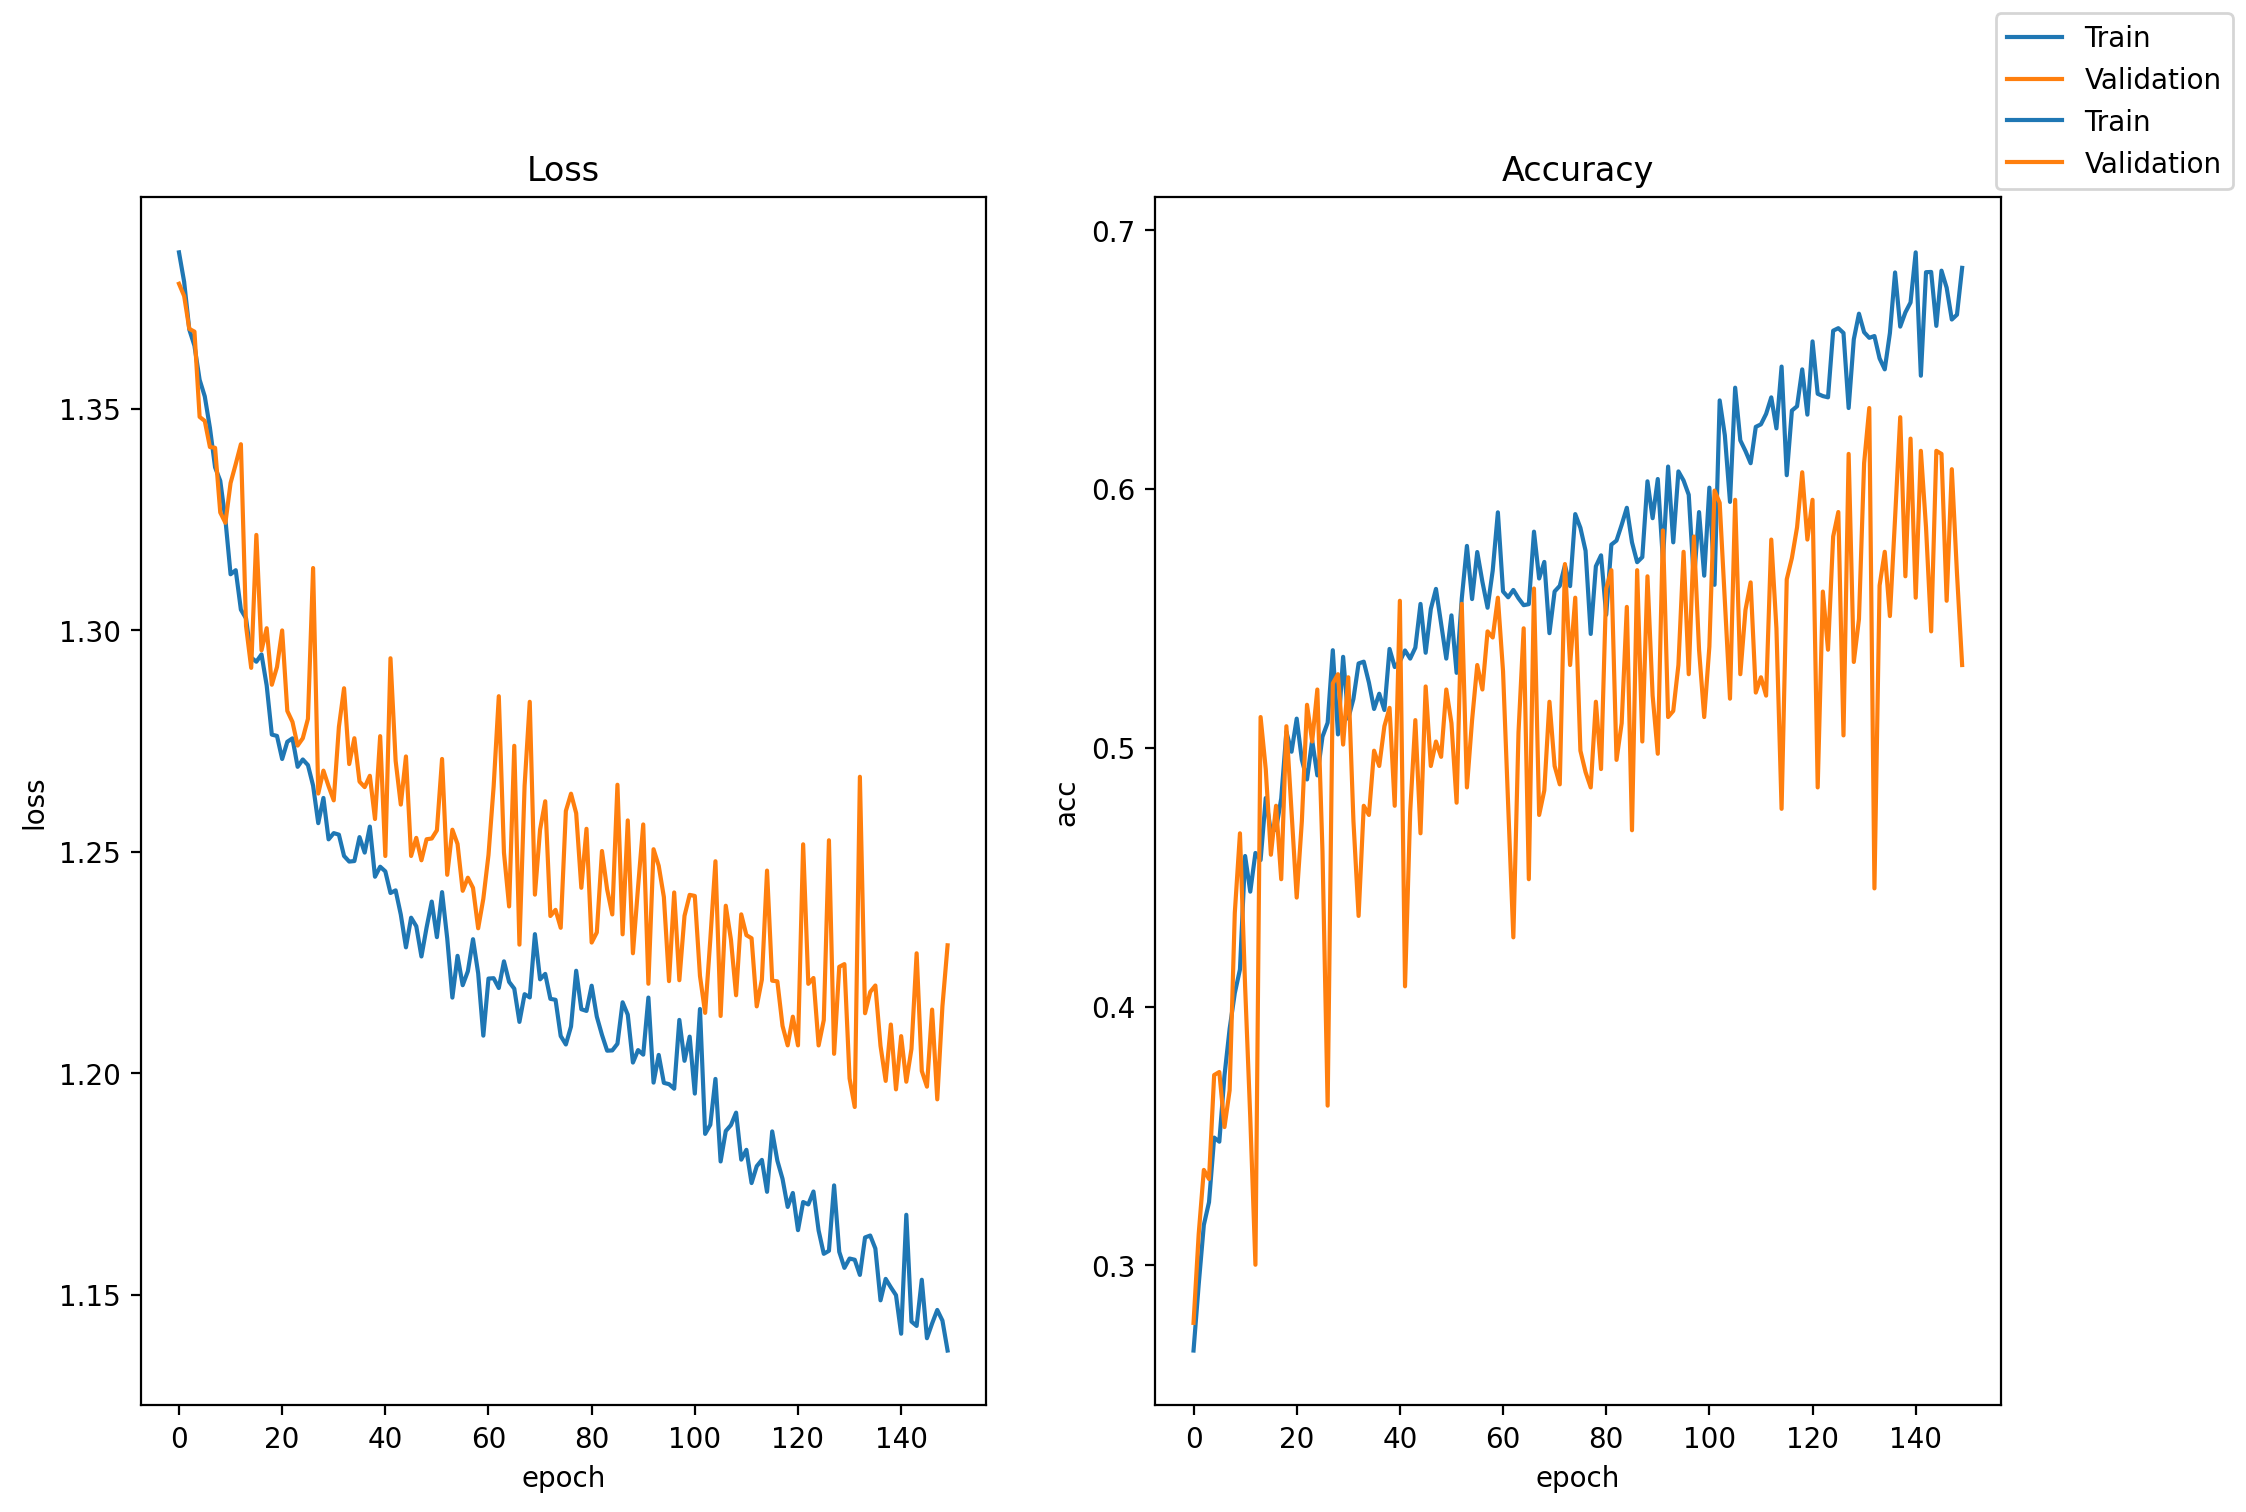

In [3]:
encoder_opt = {
    'gate_conv_size': 7,
    'gate_conv_out_channel': 60,
    'prob_conv_size': 7,
    'feature_conv_size':3,
    'feature_conv_out_channel': 64,
    'feature_pool_size': 7,
    'activation': 'elu',
}
model = EEGCNNv2(1,4,encoder_opt=encoder_opt,input_size=(1,22,500)).to('cuda')

options = {
    'train_batch_size': 32,
    'scheduler_patience': 100,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 150,
}
#train_val_data = eeg_train_val_loader(
#    X_train_valid_dsample_dir, y_train_valid_dsample_dir)
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dsample_dir,
        label_dir=y_train_valid_dsample_dir,
        preload_gpu=True)

In [5]:
max_val = np.max(logs['val_acc'])
print('The maximum of the validation is: {}'.format(max_val))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
test_loader = eeg_test_loader(X_test_dsample_dir,y_test_dsample_dir,loss_fn,device) 
loss,acc = test_net(model,test_loader,loss_fn,device)
print(acc)

The maximum of the validation is: 0.6312056737588653
0.4898419864559819


## Parameter adjsut 


In [69]:
torch.cuda.empty_cache() 

In [ ]:
encoder_parm = {
    'gate_conv_sizes':[7,15,31],
    'gate_conv_out_channel':[16,32,64],
    'prob_conv_size':[3,6],
    'prob_down_sample':[2,3],
    'feature_conv_size':[7,15,31],
    'feature_conv_out_channel':[32,64],
    'feature_pool_type':['max','avg'],
    'feature_pool_size':[2,4,6],
    'activation': ['none','elu'],
}



### Activation 


Start Training with param: (31, 60, 6, 3, 31, 64, 'avg', 6, 'elu')
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.359408
0	1.387478	0.289673	1.369235	0.316785	
--Iter 49	1.326663
1	1.364225	0.338612	1.359353	0.378251	
--Iter 49	1.355547
2	1.353451	0.357985	1.348994	0.338061	
--Iter 49	1.326869
3	1.332856	0.404060	1.326074	0.413712	
--Iter 49	1.322810
4	1.315999	0.428824	1.320774	0.423168	
--Iter 49	1.280053
5	1.301038	0.459400	1.305633	0.423168	
--Iter 49	1.298176
6	1.287062	0.480711	1.289559	0.465721	
--Iter 49	1.281326
7	1.277596	0.485259	1.295872	0.408983	
--Iter 49	1.217668
8	1.272333	0.496378	1.279414	0.510638	
--Iter 49	1.265298
9	1.251606	0.550286	1.263518	0.505910	
--Iter 49	1.284785
10	1.239945	0.540937	1.265979	0.491726	
--Iter 49	1.223928
11	1.231097	0.558794	1.259122	0.496454	
--Iter 49	1.213646
12	1.219245	0.590381	1.258401	0.486998	
--Iter 49	1.174671
13	1.214014	0.588780	1.232062	0.581560	
--Iter 49	1.174982
14	1.212769	0.560984	1.246805	0.5

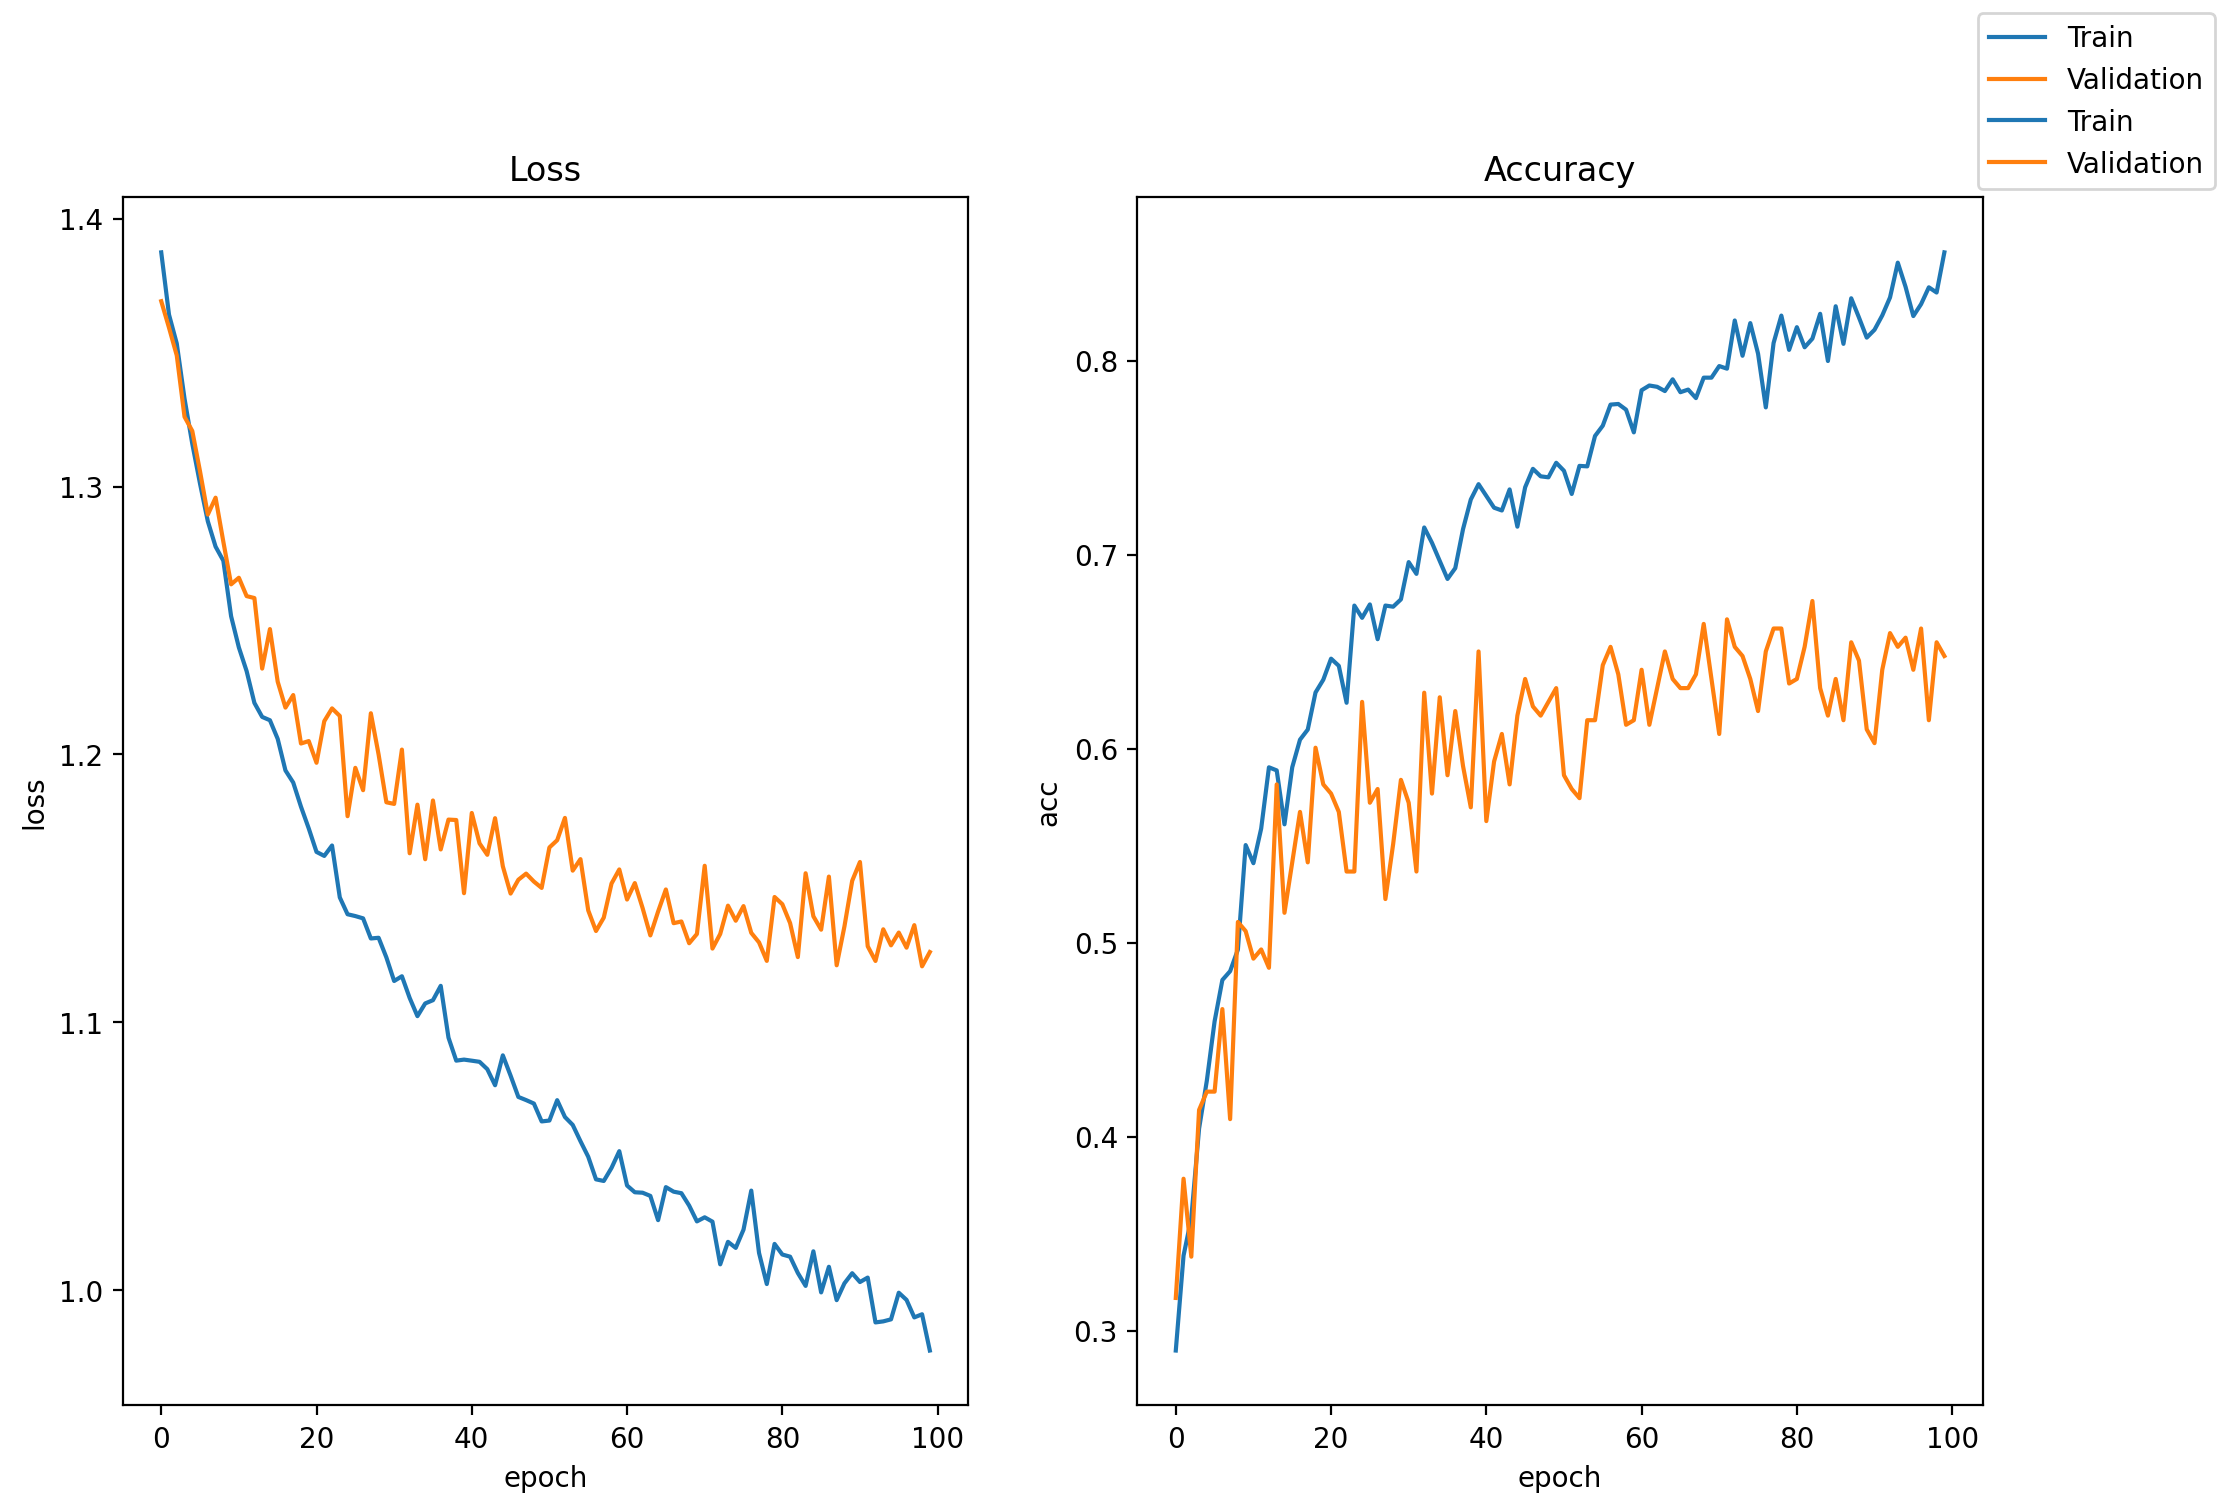

current max val_acc:0.6761229314420804 with param:(31, 60, 6, 3, 31, 64, 'avg', 6, 'elu')


NameError: name 'acc' is not defined

In [5]:

encoder_parm = {
    'gate_conv_sizes':[7,15,31],
    'gate_conv_out_channel':[30,60],
    'prob_conv_size':[3,6],
    'prob_down_sample':[2,3],
    'feature_conv_size':[7,31],
    'feature_conv_out_channel':[32,64],
    'feature_pool_type':['max','avg'],
    'feature_pool_size':[2,6],
    'activation': ['elu'],
}
train_options = {
    'train_batch_size': 32,
    'scheduler_patience': 100,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 100,
}
model = EEGCNNv2
solver = EEGCNN_solver(model,data_dir=X_train_valid_dir,label_dir=y_train_valid_dir,model_encoder_opt=encoder_parm,train_opt=train_options)
params_log = solver.solve_param()
print(params_log)